## Data loading

In [2]:
# Required libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# b) Load data set
data = pd.read_csv('DS1_C9_S1_Practice_Income_Data.csv')
data.head()

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Task1: Data exploration

In [11]:
#a) Data structure
work_df = data
print('structure of data set:',work_df.shape)
work_df.info()

structure of data set: (32561, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Capital_Gain    32561 non-null  int64 
 9   Capital_Loss    32561 non-null  int64 
 10  Hours_Per_Week  32561 non-null  int64 
 11  Native_Country  32561 non-null  object
 12  Income_Bracket  32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [13]:
work_df.describe()

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [15]:
#b) categorical coumns: distinct values and their counts
work_df.select_dtypes(include='object').columns

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [11]:
work_df.WorkClass.value_counts()

WorkClass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
work_df.Education.value_counts()

Education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [15]:
work_df.Marital_Status.value_counts()

Marital_Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [17]:
work_df.Occupation.value_counts()

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [19]:
work_df.Relationship.value_counts()

Relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [21]:
work_df.Gender.value_counts()

Gender
Male      21790
Female    10771
Name: count, dtype: int64

In [23]:
work_df.Native_Country.value_counts()

Native_Country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [25]:
work_df.Income_Bracket.value_counts()

Income_Bracket
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Task2: Missing value treatment

In [18]:
#a) check for missing values
work_df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [20]:
# b) Treating error values like '?'
work_df['Occupation'] = work_df['Occupation'].replace(to_replace=' ?',value=work_df['Occupation'].mode()[0])
work_df.Occupation.value_counts()

Occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [63]:
work_df['WorkClass'] = work_df['WorkClass'].replace(to_replace=' ?',value=work_df['WorkClass'].mode()[0])
work_df.WorkClass.value_counts()

C:\Users\Priya\AppData\Local\Temp\ipykernel_18232\690754554.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  work_df['WorkClass'] = work_df['WorkClass'].replace(to_replace=' ?',value=work_df['WorkClass'].mode()[0])


WorkClass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [22]:
work_df['Native_Country'] = work_df['Native_Country'].replace(to_replace=' ?',value=work_df['Native_Country'].mode()[0])
work_df.Native_Country.value_counts()

Native_Country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

### Task3: Data preprocessing

In [25]:
# Feature engineering
Label_Encoder = preprocessing.LabelEncoder()
obj_list = ['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']
for col in obj_list:
    # a) convert non numeric columns to 'category' type column
    work_df[col] = work_df[col].astype("category") 
    # b) convert category column to numeric column using Label Encoder technique
    work_df[col+str('_encode')] = Label_Encoder.fit_transform(work_df[col]) 

In [27]:
work_df.head(10)

,Age,WorkClass,Fnlwgt,Education,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,...,Native_Country,Income_Bracket,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,...,United-States,<=50K,7,9,4,0,1,1,38,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,<=50K,6,9,2,3,0,1,38,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,...,United-States,<=50K,4,11,0,5,1,1,38,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,...,United-States,<=50K,4,1,2,5,0,1,38,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,...,Cuba,<=50K,4,9,2,9,5,0,4,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,...,United-States,<=50K,4,12,2,3,5,0,38,0
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,...,Jamaica,<=50K,4,6,3,7,1,0,22,0
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,...,United-States,>50K,6,11,2,3,0,1,38,1
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,Female,14084,0,...,United-States,>50K,4,12,4,9,1,0,38,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,...,United-States,>50K,4,9,2,3,0,1,38,1


In [29]:
work_df.dtypes

Age                         int64
WorkClass                category
Fnlwgt                      int64
Education                category
Marital_Status           category
Occupation               category
Relationship             category
Gender                   category
Capital_Gain                int64
Capital_Loss                int64
Hours_Per_Week              int64
Native_Country           category
Income_Bracket           category
WorkClass_encode            int32
Education_encode            int32
Marital_Status_encode       int32
Occupation_encode           int32
Relationship_encode         int32
Gender_encode               int32
Native_Country_encode       int32
Income_Bracket_encode       int32
dtype: object

In [31]:
# c) Data scaling or feature scaling
def feature_scale(scale):
    numeric = ['int64','int32']
    new_work = work_df.select_dtypes(include=numeric)
    if scale=='minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScalar()
    scaled_df =pd.DataFrame(scaler.fit_transform(new_work.to_numpy()),columns=new_work.columns)
    return scaled_df

In [33]:
scale='minmax'
work_scaled = feature_scale(scale)
work_scaled

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
0,0.301370,0.044302,0.021740,0.0,0.397959,0.875,0.600000,0.666667,0.000000,0.2,1.0,0.95,0.0
1,0.452055,0.048238,0.000000,0.0,0.122449,0.750,0.600000,0.333333,0.230769,0.0,1.0,0.95,0.0
2,0.287671,0.138113,0.000000,0.0,0.397959,0.500,0.733333,0.000000,0.384615,0.2,1.0,0.95,0.0
3,0.493151,0.151068,0.000000,0.0,0.397959,0.500,0.066667,0.333333,0.384615,0.0,1.0,0.95,0.0
4,0.150685,0.221488,0.000000,0.0,0.397959,0.500,0.600000,0.333333,0.692308,1.0,0.0,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.000000,0.0,0.377551,0.500,0.466667,0.333333,0.923077,1.0,0.0,0.95,0.0
32557,0.315068,0.096500,0.000000,0.0,0.397959,0.500,0.733333,0.333333,0.461538,0.0,1.0,0.95,1.0
32558,0.561644,0.094827,0.000000,0.0,0.397959,0.500,0.733333,1.000000,0.000000,0.8,0.0,0.95,0.0
32559,0.068493,0.128499,0.000000,0.0,0.193878,0.500,0.733333,0.666667,0.000000,0.6,1.0,0.95,0.0


In [35]:
# d) feature selection
corr = work_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Fnlwgt,Capital_Gain,Capital_Loss,Hours_Per_Week,WorkClass_encode,Education_encode,Marital_Status_encode,Occupation_encode,Relationship_encode,Gender_encode,Native_Country_encode,Income_Bracket_encode
Age,1.000000,-0.076646,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,0.001739,-0.263698,0.088832,-0.000270,0.234037
Fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.000188,0.008931,0.026858,-0.063286,-0.009463
Capital_Gain,0.077674,0.000432,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.018021,-0.057919,0.048480,0.008819,0.223329
Capital_Loss,0.057775,-0.010252,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.009680,-0.061062,0.045567,0.009401,0.150526
Hours_Per_Week,0.068756,-0.018768,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,-0.012879,-0.248974,0.229309,0.006592,0.229689
WorkClass_encode,0.003787,-0.016656,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,-0.106168,-0.090461,0.095981,-0.003355,0.051604
Education_encode,-0.010508,-0.028145,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.041279,-0.010876,-0.027356,0.076060,0.079317
Marital_Status_encode,-0.266288,0.028153,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,0.034962,0.185451,-0.129314,-0.021278,-0.199307
Occupation_encode,0.001739,0.000188,0.018021,0.009680,-0.012879,-0.106168,-0.041279,0.034962,1.000000,-0.037451,0.047461,-0.002217,0.034625
Relationship_encode,-0.263698,0.008931,-0.057919,-0.061062,-0.248974,-0.090461,-0.010876,0.185451,-0.037451,1.000000,-0.582454,-0.010712,-0.250918


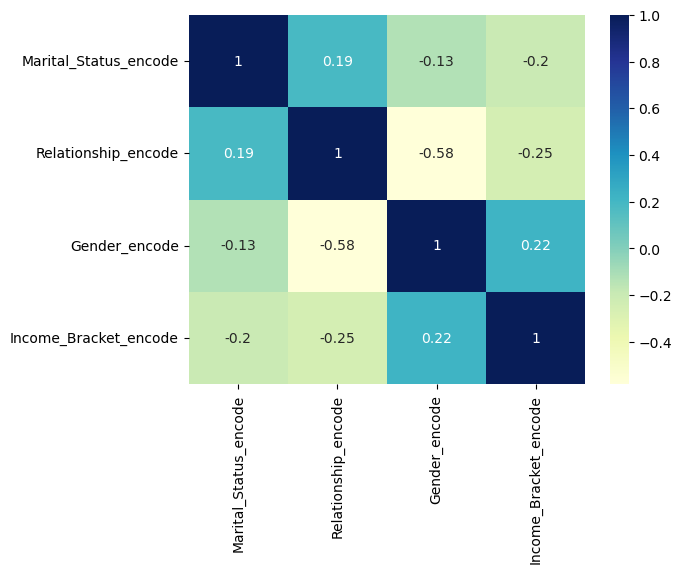

In [37]:
new_df = work_scaled[['Marital_Status_encode','Relationship_encode','Gender_encode','Income_Bracket_encode']]
sns.heatmap(new_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [39]:
work_df = work_df.drop('Relationship_encode',axis = 1)
work_df.info()
# Relationship encode feature is removed as it negatively affects gender encode and income bracket encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    32561 non-null  int64   
 1   WorkClass              32561 non-null  category
 2   Fnlwgt                 32561 non-null  int64   
 3   Education              32561 non-null  category
 4   Marital_Status         32561 non-null  category
 5   Occupation             32561 non-null  category
 6   Relationship           32561 non-null  category
 7   Gender                 32561 non-null  category
 8   Capital_Gain           32561 non-null  int64   
 9   Capital_Loss           32561 non-null  int64   
 10  Hours_Per_Week         32561 non-null  int64   
 11  Native_Country         32561 non-null  category
 12  Income_Bracket         32561 non-null  category
 13  WorkClass_encode       32561 non-null  int32   
 14  Education_encode       32561 non-null 

### Task4: Data splitting

In [42]:
# a) splitting data into train & test set with ratio 70:30 by row index
train_num = int(32561*0.7)
train_work = work_df.iloc[:train_num:]
test_work = work_df.iloc[(train_num+1)::]
print(f'shape of train data is {train_work.shape}; shape of test data is {test_work.shape}')

shape of train data is (22792, 20); shape of test data is (9768, 20)


In [44]:
# b) splitting data into train & test set with ratio 70:30 by train_test_split() method
X=work_df
y=work_df['Occupation']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)
print(f'shape of X train data is {X_train.shape}; shape of X test data is {X_test.shape}')
print(f'shape of y train data is {y_train.shape}; shape of y test data is {y_test.shape}')

shape of X train data is (22792, 20); shape of X test data is (9769, 20)
shape of y train data is (22792,); shape of y test data is (9769,)


### Task5: Data visualization

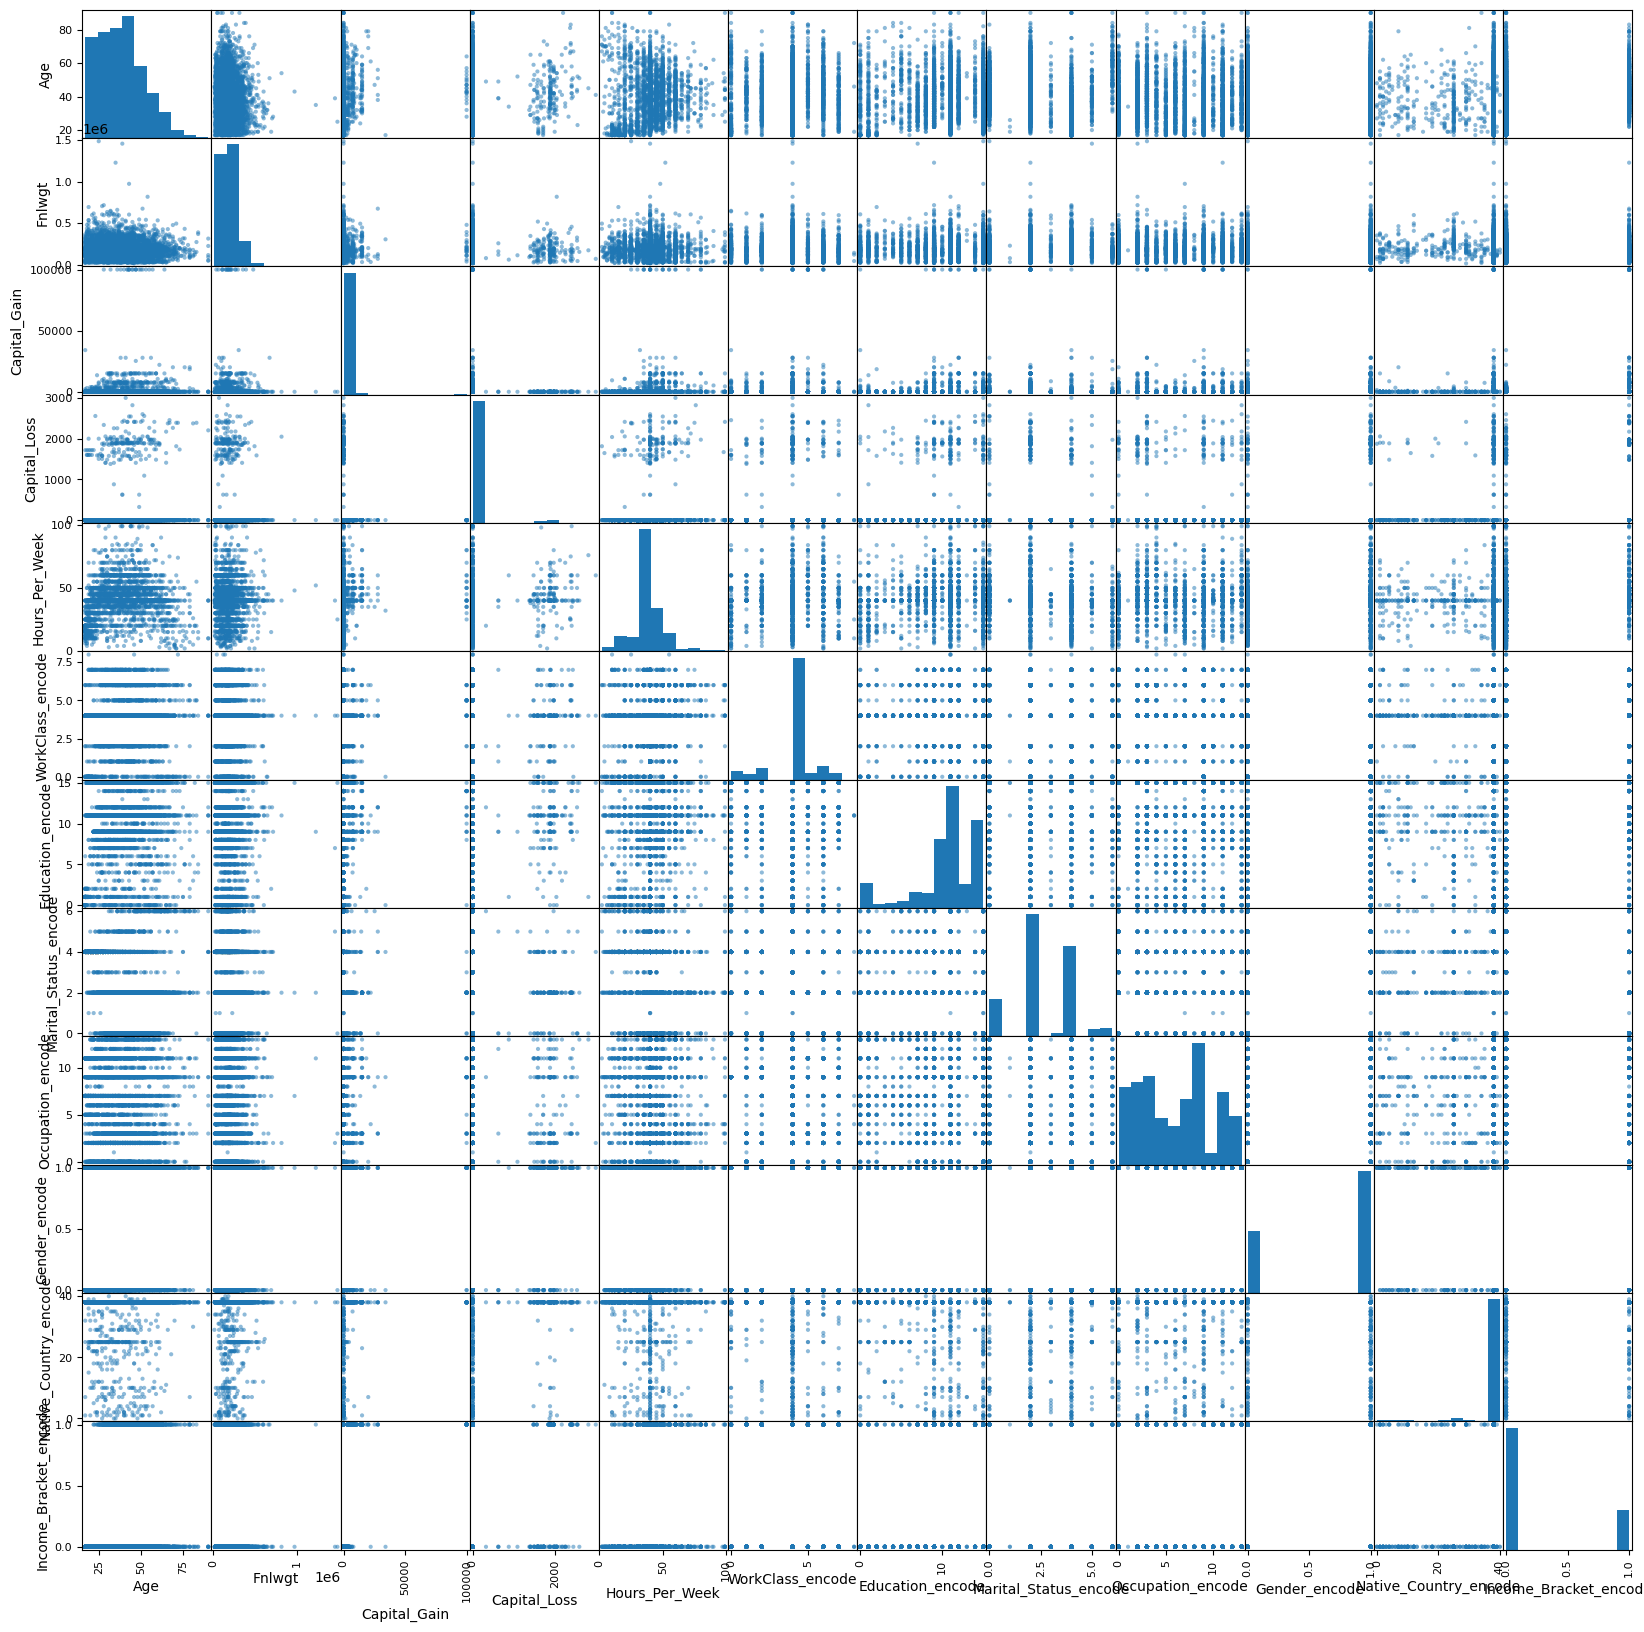

In [49]:
# Scatter matrix plot
num_work = work_df.select_dtypes(exclude='category')
pd.plotting.scatter_matrix(num_work.sample(n=4000),figsize=(20,20))
plt.show()

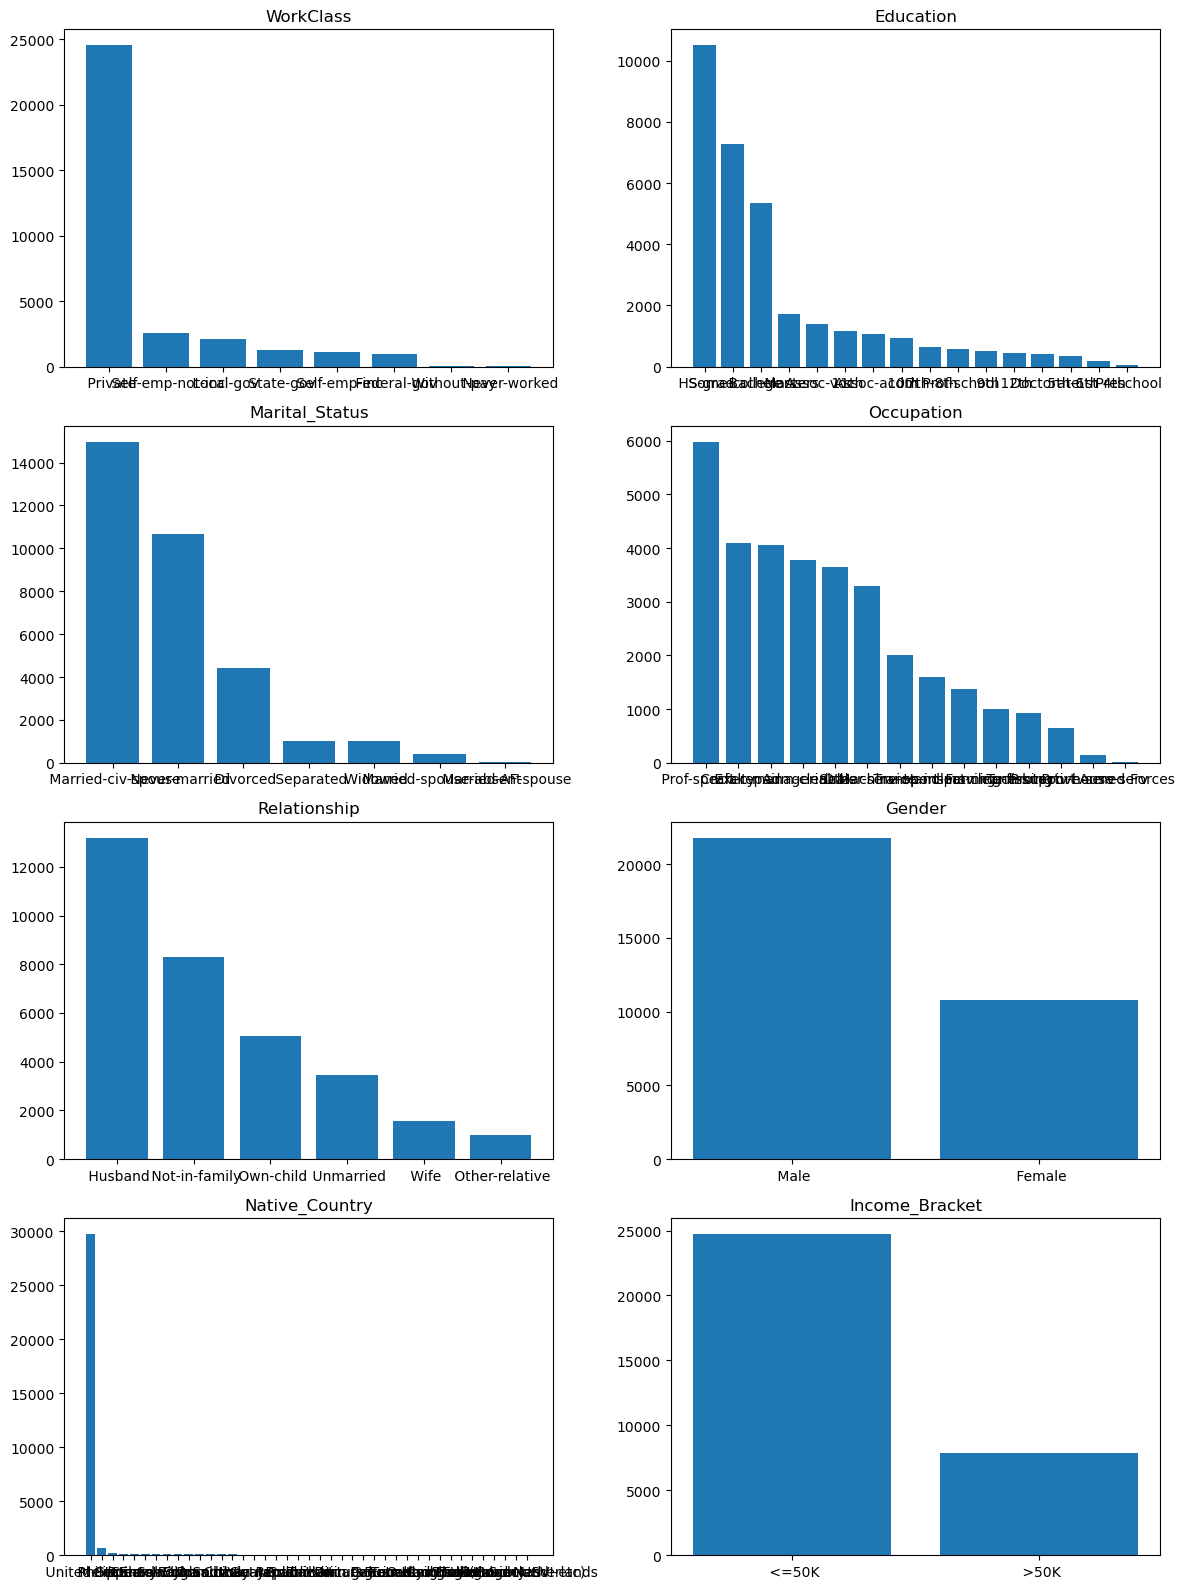

In [153]:
# Histogram for category columns
fig,ax=plt.subplots(4,2,tight_layout = True,figsize=(12,16))
cat_work = work_df.select_dtypes(include='category')
k=0
for col, ax in zip(cat_work, ax.flatten()):
    stats = cat_work[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : str(x),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
plt.show()

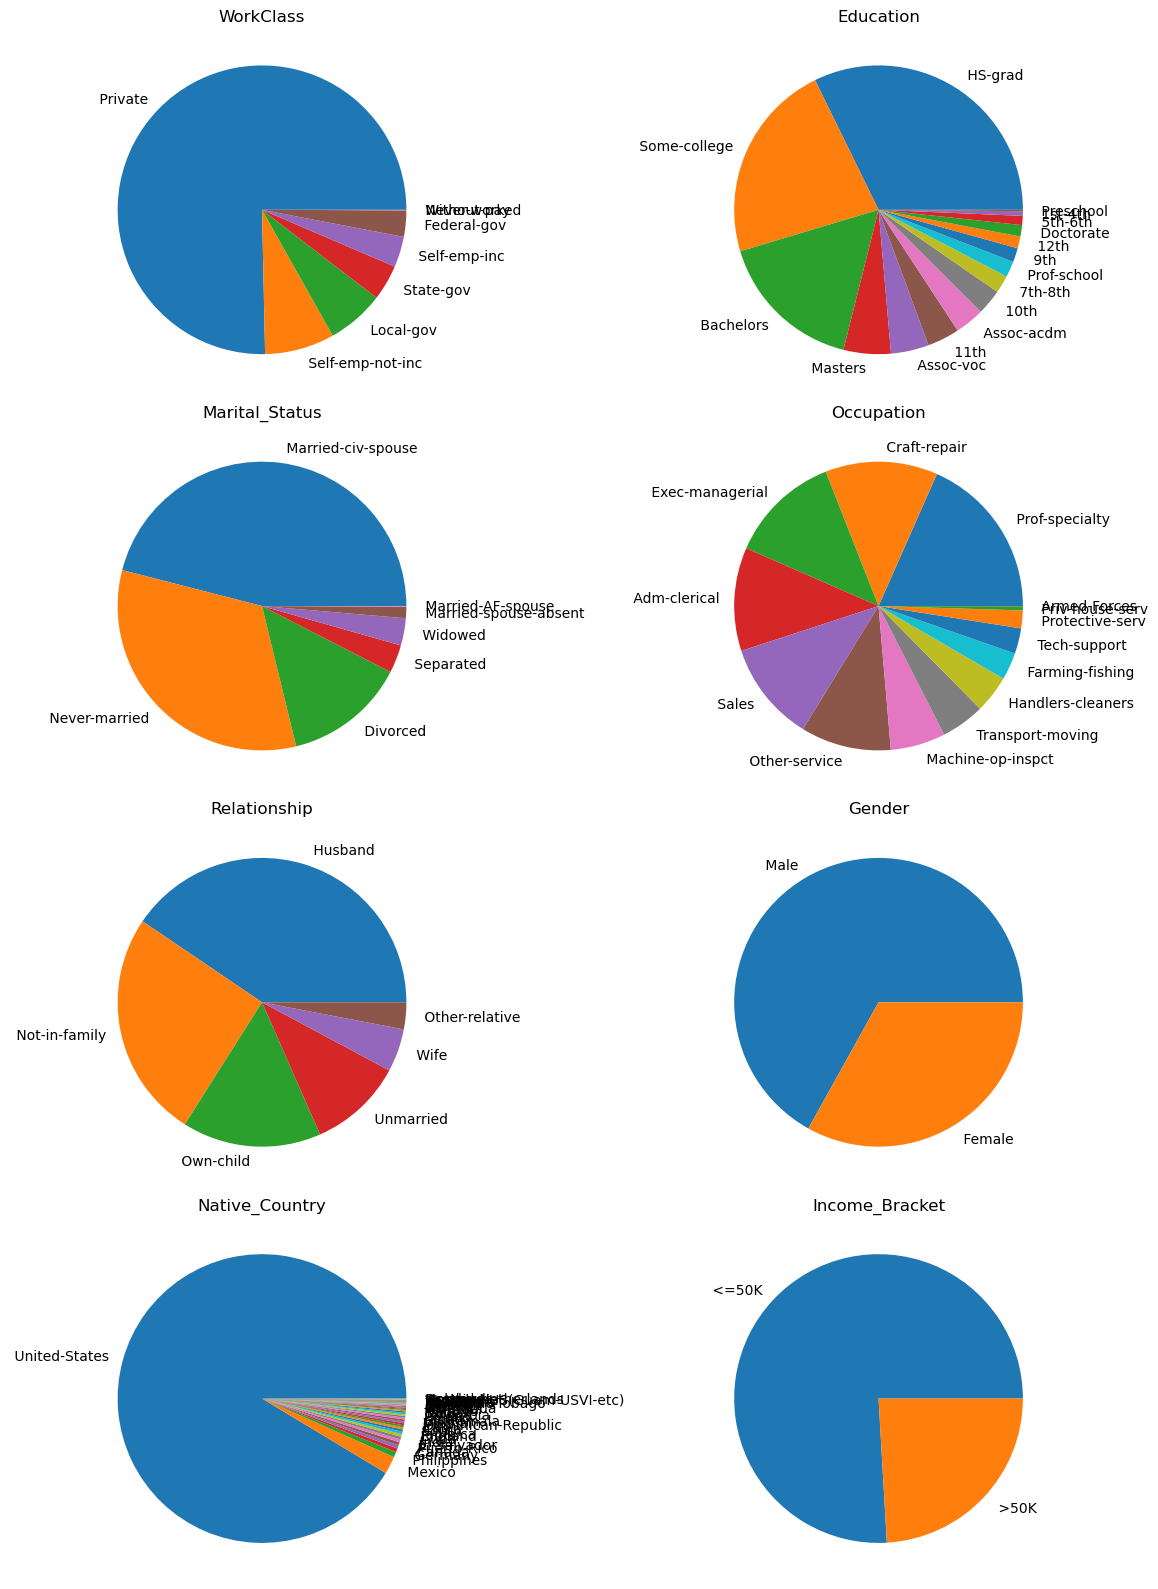

In [139]:
# Pie chart for all category columns
fig,ax=plt.subplots(4,2,tight_layout = True,figsize=(12,16))
cat_work = work_df.select_dtypes(include='category')
k=0
for col, ax in zip(cat_work, ax.flatten()):
    stats = cat_work[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : str(x),list(stats.index)))
    ax.pie(values,labels=names)
    ax.set_title(col)
plt.show()